# 大数据技术与应用 大作业02——深度学习实验

## 大作业目标及内容
 - 数据集构建
 - 模型搭建
 - 模型训练
 - 模型测试验证可视化结果
 

## 实验准备
 - 教程：
  -  PyTorch深度学习框架：https://pytorch.org/ 
  -  Jiagu：https://github.com/ownthink/Jiagu
  -  BiLSTM-CRF pytorch：https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html#sphx-glr-beginner-nlp-advanced-tutorial-py  

- 工具：Pycharm，Python 3.6，PyTorch，Jiagu（也可以用其他NLP工具包）  
- 数据：第三次实验爬取的百度新闻文章（[https://news.baidu.com/](https://news.baidu.com/)）  
 
 
## 大作业相关信息
 - 大作业成绩：总分40分 = 30分实验报告 + 10分现场验收（可能包括讲解代码+运行代码+回答问题）
 - 大作业提交及验收：  
    1、验收时间：两次验收时间12月20日和12月27日。具体时间和地点另行通知。  
    2、实验报告提交时间：12月29日23:59之前为首次提交截止时间；晚于此时间提交成绩-1分。以作业接收邮箱的系统时间为准，邮箱账号gjxybigdata2019@126.com，邮件主题 学号-姓名-大作业02。  
    3、作业要求每位同学独立完成。  


 ---

# 数据集构建

高质量的数据集的收集和构建从来不是一件容易的事情，本次实验中为了简化过程，采用使用NLP工具包Jiagu得出的结果进行数据标注，来构建数据集。  
  
 - 数据来源：[百度新闻](https://news.baidu.com/)  
 - 标注工具：[Jiagu](https://github.com/ownthink/Jiagu)  
  
具体操作如下：  
 1. 将30篇已爬取的百度新闻文章进行清洗
 2. 标注处理后的文本
 3. 保存数据集

In [1]:
# 此处数据爬取了2019年12月4日中午12点左右所有页面上可以用的百度新闻
# 共381条，爬取的时候同时使用了python脚本简单清洗了，结果如下

In [1]:
# 准备数据——百度新闻数据
# 准备数据——百度新闻数据

f = open("./raws/material.txt", encoding='utf-8')
sourceInLine = f.readlines()
dataset = []
for line in sourceInLine:
    tmp = line.strip("\n")
    dataset.append(line)
print(dataset[0])
print(dataset[1])
print(dataset[2])
print(dataset[3])
print(dataset[4])

Uzi可能去不了全明星？德云色：两个韩国人代表LPL真的不舒服随着英雄联盟S9全球总决赛赛事的结束，对广大的英雄联盟观众而言最期待的莫过于就是即将到来的S9全明星赛事了，相比于S系列赛事而言，这个一年一度的全明星赛事自然是更偏娱乐一些的，各大赛区参赛选手也都是由广大观众票选出来的，在今年的投票中，票数最高的两位选手将参加世界LOL全明星赛事，到目前位置，票数最高的三位选手为Theshy，Uzi和Doinb。在目前的投票中，Uzi与Doinb的票数可以说是相当接近的，再加上在海外的投票中Doinb位列第一，领先Uzi很多，虽说海外投票仅以20%计算，但毕竟也是一个得票渠道，所以说按目前的情况来分析，Uzi今年有很大可能是去不了全明星了。不久前，在著名LOL主播组合德云色的一次直播中有观众就提到了这个问题，当时笑笑和西卡直言道，Uzi去不了全明星就卸载LOL。西卡表示，虽然我并不是战狼，但如果让两个韩国人代表LPL赛区参加全明星赛还是有些不舒服的。一旁的笑笑也接着说道，我现在就很不舒服了。可以说是非常真实了。西卡和笑笑的这番话可以说还是有些偏激的，作为今年的S9冠军得主，Doinb为我们LPL赛区做出的贡献是有目共睹的，在夺冠后的各种采访中Doinb也一直站在我们LPL赛区的立场上发言，可以说他是完全有资格代表我们LPL赛区的。当然Uzi自然也是我们LPL的一个招牌，在七年的职业生涯中，Uzi已经为我们LPL赛区夺得了太多荣誉，继微笑之后他用自己的实力打出了国产AD的金字招牌，各大赛区明星选手都对他赞不绝口。而且值得一说的是，Uzi和Doinb也是曾经的队友，双方私下的关系也是很好的，也希望最后无论谁去参加全明星都能玩的开心一点吧。最后，各位大佬，大家对即将到来的全明星赛事，对Uzi和Doinb这两名选手有什么看法呢？欢迎在评论区互动留言哦。

电子竞技市场规模超千亿元，机构认为游戏板块仍是今年投资机会的主旋律11月19日，A股三大股指开盘分化，沪指跌0.17%，深成指涨0.06%，创业板指涨0.19%。电子竞技、网络游戏板块早盘快速拉升上涨，截至发稿，恺英网络、盛天网络等涨停，鼎龙文化涨超6%，三七互娱、游族网络涨幅居前。电子竞技市场规模超千亿元在LOL（英雄联盟）S9全球总决赛中，来自中国赛区的电子竞技队LPL战队FunPlusPhoenis（FPX）以3：0的大比

In [2]:
baidu_news=dataset

In [3]:
print('文章数 ：{}'.format(len(baidu_news)))

文章数 ：30


In [4]:
# 进一步处理数据，进行文本标注

import jiagu as jg
import numpy as np
import re

In [5]:
# 清洗数据
from string import digits,punctuation # digits 数字字符，punctuation 英文标点
# 中文标点
hanzi = '＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'
# 建立正则表达式规则，保留汉字字符、中文标点字符、数字字符、英文字符、英文标点字符，其他字符去除
# 正则表达式找出其他字符，^ 表示非
rule = re.compile(u'[^a-zA-Z' # 英文字符
                  + digits # 数字字符
                  + punctuation #英文标点字符
                  + hanzi # 中文标点字符
                  + '\u4e00-\u9fa5]+' #汉字字符
                 )

baidu_news_text = list()

for article_text in list(baidu_news):
    article_text = re.sub(rule, '', article_text) # 将其他字符替换为空字符
    baidu_news_text.append(article_text)

In [6]:
# 简单分句
sentences = list()
for article_text in baidu_news_text:
    article_sentences = re.split('(。|！|\!|？|\?)',article_text) # 保留分割符
    last = ''
    if len(article_sentences) % 2 != 0:
        last = article_sentences[-1]
    article_sentences = [article_sentences[2*i]+article_sentences[2*i+1] for i in range(int(len(article_sentences) / 2))] # 将分隔符与句子拼接
    if last != '':
        article_sentences.append(last)
    sentences.extend(article_sentences)

print("分句示例：")
for index,sent in enumerate(sentences[:50]):
    print('句子{} ：{}'.format(index,sent))

分句示例：
句子0 ：Uzi可能去不了全明星？
句子1 ：德云色：两个韩国人代表LPL真的不舒服随着英雄联盟S9全球总决赛赛事的结束，对广大的英雄联盟观众而言最期待的莫过于就是即将到来的S9全明星赛事了，相比于S系列赛事而言，这个一年一度的全明星赛事自然是更偏娱乐一些的，各大赛区参赛选手也都是由广大观众票选出来的，在今年的投票中，票数最高的两位选手将参加世界LOL全明星赛事，到目前位置，票数最高的三位选手为Theshy，Uzi和Doinb。
句子2 ：在目前的投票中，Uzi与Doinb的票数可以说是相当接近的，再加上在海外的投票中Doinb位列第一，领先Uzi很多，虽说海外投票仅以20%计算，但毕竟也是一个得票渠道，所以说按目前的情况来分析，Uzi今年有很大可能是去不了全明星了。
句子3 ：不久前，在著名LOL主播组合德云色的一次直播中有观众就提到了这个问题，当时笑笑和西卡直言道，Uzi去不了全明星就卸载LOL。
句子4 ：西卡表示，虽然我并不是战狼，但如果让两个韩国人代表LPL赛区参加全明星赛还是有些不舒服的。
句子5 ：一旁的笑笑也接着说道，我现在就很不舒服了。
句子6 ：可以说是非常真实了。
句子7 ：西卡和笑笑的这番话可以说还是有些偏激的，作为今年的S9冠军得主，Doinb为我们LPL赛区做出的贡献是有目共睹的，在夺冠后的各种采访中Doinb也一直站在我们LPL赛区的立场上发言，可以说他是完全有资格代表我们LPL赛区的。
句子8 ：当然Uzi自然也是我们LPL的一个招牌，在七年的职业生涯中，Uzi已经为我们LPL赛区夺得了太多荣誉，继微笑之后他用自己的实力打出了国产AD的金字招牌，各大赛区明星选手都对他赞不绝口。
句子9 ：而且值得一说的是，Uzi和Doinb也是曾经的队友，双方私下的关系也是很好的，也希望最后无论谁去参加全明星都能玩的开心一点吧。
句子10 ：最后，各位大佬，大家对即将到来的全明星赛事，对Uzi和Doinb这两名选手有什么看法呢？
句子11 ：欢迎在评论区互动留言哦。
句子12 ：电子竞技市场规模超千亿元，机构认为游戏板块仍是今年投资机会的主旋律11月19日，A股三大股指开盘分化，沪指跌0.17%，深成指涨0.06%，创业板指涨0.19%。
句子13 ：电子竞技、网络游戏板块早盘快速拉升上涨，截至发稿，恺英网络、盛天网络等涨停，鼎龙文化涨超

In [7]:
# 分词
segment_model_path = 'cnc.model' # 分词模型路径
jg.load_model(segment_model_path) # 使用国家语委分词标准

article_words = list()
for sent in sentences:
    words = jg.cut(sent)
    article_words.append(words)

print('分词结果示例:')
for index,words in enumerate(article_words[:50]):
    print('分词{} ：{}'.format(index, '/'.join(words)))

分词结果示例:
分词0 ：Uzi/可能/去不了/全明星/？
分词1 ：德云色/：/两个/韩国人/代表/LPL/真的/不舒服/随着/英雄联盟/S9全球/总决赛/赛事/的/结束/，/对/广大/的/英雄联盟/观众/而言/最/期待/的/莫过于/就是/即将/到来/的/S9/全明星/赛事/了/，/相比/于/S系列/赛事/而言/，/这个/一年一度/的/全明星/赛事/自然/是/更/偏/娱乐/一些/的/，/各/大/赛区/参赛/选手/也/都/是/由/广大/观众/票选/出来/的/，/在/今年/的/投票/中/，/票数/最高/的/两位/选手/将/参加/世界/LOL/全明星/赛事/，/到/目前/位置/，/票数/最高/的/三位/选手/为/Theshy/，/Uzi/和/Doinb/。
分词2 ：在/目前/的/投票/中/，/Uzi/与/Doinb/的/票数/可以说/是/相当/接近/的/，/再加上/在/海外/的/投票/中/Doinb/位列/第一/，/领先/Uzi/很多/，/虽说/海外/投票/仅以/20%/计算/，/但/毕竟/也是/一个/得票/渠道/，/所以说/按/目前/的/情况/来/分析/，/Uzi/今年/有/很/大/可能/是/去不了/全明星/了/。
分词3 ：不久前/，/在/著名/LOL/主播/组合/德云色/的/一次/直播/中/有/观众/就/提到/了/这个/问题/，/当时/笑笑/和/西卡/直言道/，/Uzi/去不了/全明星/就/卸载/LOL/。
分词4 ：西卡/表示/，/虽然/我/并不是/战狼/，/但/如果/让/两个/韩国人/代表/LPL/赛区/参加/全明星赛/还是/有些/不舒服/的/。
分词5 ：一旁/的/笑笑/也/接着/说道/，/我/现在/就/很/不舒服/了/。
分词6 ：可以说/是/非常/真实/了/。
分词7 ：西卡/和/笑笑/的/这/番/话/可以说/还是/有些/偏激/的/，/作为/今年/的/S9/冠军/得主/，/Doinb/为/我们/LPL/赛区/做出/的/贡献/是/有目共睹/的/，/在/夺冠/后/的/各种/采访/中/Doinb/也/一直/站在/我们/LPL/赛区/的/立场/上/发言/，/可以说/他/是/完全/有/资格/代表/我们/LPL/赛区/的/。
分词8 ：当然/Uzi/自然/也是/我们/LPL/的/一个/招牌/，/在/七年/的/职业/生涯/中/，/Uzi/已经/为/我们/LPL/赛区

In [8]:
# 词性标注
pos_results = list()

for words in article_words:
    pos = jg.pos(words) # 词性标注
    pos_results.append(pos)

print('PoS结果示例:')
for index, (words, pos) in enumerate(zip(article_words[:50],pos_results[:50])):
    print('PoS {} ：{}'.format(index,' '.join(['{}/{}'.format(w,p) for w,p in zip(words,pos)])))    

PoS结果示例:
PoS 0 ：Uzi/n 可能/vu 去不了/v 全明星/n ？/w
PoS 1 ：德云色/nh ：/w 两个/nh 韩国人/nh 代表/n LPL/nh 真的/a 不舒服/v 随着/p 英雄联盟/n S9全球/n 总决赛/n 赛事/n 的/u 结束/v ，/w 对/p 广大/a 的/u 英雄联盟/j 观众/n 而言/v 最/d 期待/v 的/u 莫过于/v 就是/d 即将/d 到来/v 的/u S9/n 全明星/n 赛事/v 了/u ，/w 相比/v 于/p S系列/n 赛事/n 而言/v ，/w 这个/r 一年一度/i 的/u 全明星/n 赛事/n 自然/d 是/vl 更/d 偏/a 娱乐/v 一些/m 的/u ，/w 各/r 大/a 赛区/n 参赛/v 选手/n 也/d 都/d 是/vl 由/p 广大/a 观众/n 票选/n 出来/vd 的/u ，/w 在/p 今年/nt 的/u 投票/v 中/nd ，/w 票数/n 最高/a 的/u 两位/n 选手/n 将/d 参加/v 世界/n LOL/n 全明星/n 赛事/n ，/w 到/v 目前/nt 位置/n ，/w 票数/n 最高/a 的/u 三位/n 选手/n 为/vl Theshy/n ，/w Uzi/n 和/c Doinb/n 。/w
PoS 2 ：在/p 目前/nt 的/u 投票/v 中/nd ，/w Uzi/n 与/c Doinb/n 的/u 票数/n 可以说/v 是/vl 相当/d 接近/v 的/u ，/w 再加上/v 在/p 海外/nl 的/u 投票/v 中/nd Doinb/v 位列/n 第一/m ，/w 领先/v Uzi/v 很多/a ，/w 虽说/c 海外/nl 投票/v 仅以/v 20%/n 计算/v ，/w 但/c 毕竟/d 也是/vl 一个/mq 得票/v 渠道/n ，/w 所以说/v 按/p 目前/nt 的/u 情况/n 来/vd 分析/v ，/w Uzi/v 今年/nt 有/v 很/d 大/a 可能/vu 是/vl 去不了/v 全明星/n 了/u 。/w
PoS 3 ：不久前/nt ，/w 在/p 著名/a LOL/n 主播/n 组合/v 德云色/n 的/u 一次/n 直播/v 中/nd 有/v 观众/n 就/d 提到/v 了/u 这个/r 问题/n ，/w 当时/n

In [9]:
# 生成文本标注
# 使用“BIS”标注方式，B:表示语句块的开始，I:表示非语句块的开始，S:表示单独成词（token）
# 这里需要注意的是，我们要把什么当做token，token是模型训练中，映射为一个id的文本，它可以是一个字，也可以是一个词。
# 这里我们的规则是：将每个中文字符，每个中文标点字符，每串数字，每个英文单词或者其他包含数字和英文字符的连续文本作为一个token
# 比如：你，来，apple，Q&A 都是一个token
# 分token示例：“外媒gsmarena/ni” ,要标注为 [外 媒 gsmarena] [B-ni I-ni I-ni]，一共3个token

# 按照中文字符及标点分割
pattern = re.compile(r'([\u4e00-\u9fa5＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。])') 

labeled_data = list()
for index,(words,pos) in enumerate(zip(article_words,pos_results)):
        ts = list()
        ps = list()
        for w,p in zip(words,pos):
            # 单词长度为0，跳过
            if len(w) <= 0:
                continue
            tokens = pattern.split(w)
            tokens = [t.strip() for t in tokens if len(t.strip()) > 0]
            # 只有一个token，标注S
            if len(tokens) == 1:
                ts.append(tokens[0])
                ps.append('S-'+p)
            # 大于一个token，标注BIII...
            else:
                for i,t in enumerate(tokens):
                    if i == 0:
                        ts.append(t)
                        ps.append('B-'+p)
                    else:
                        ts.append(t)
                        ps.append('I-'+p)
        labeled_data.append((ts,ps))

print('标注数据示例：')
for index,(ts,ps) in enumerate(labeled_data[:50]):
    print('标注{} : {}'.format(index,' '.join(ts) + '\t' +  ' '.join(ps)))


标注数据示例：
标注0 : Uzi 可 能 去 不 了 全 明 星 ？	S-n B-vu I-vu B-v I-v I-v B-n I-n I-n S-w
标注1 : 德 云 色 ： 两 个 韩 国 人 代 表 LPL 真 的 不 舒 服 随 着 英 雄 联 盟 S9 全 球 总 决 赛 赛 事 的 结 束 ， 对 广 大 的 英 雄 联 盟 观 众 而 言 最 期 待 的 莫 过 于 就 是 即 将 到 来 的 S9 全 明 星 赛 事 了 ， 相 比 于 S 系 列 赛 事 而 言 ， 这 个 一 年 一 度 的 全 明 星 赛 事 自 然 是 更 偏 娱 乐 一 些 的 ， 各 大 赛 区 参 赛 选 手 也 都 是 由 广 大 观 众 票 选 出 来 的 ， 在 今 年 的 投 票 中 ， 票 数 最 高 的 两 位 选 手 将 参 加 世 界 LOL 全 明 星 赛 事 ， 到 目 前 位 置 ， 票 数 最 高 的 三 位 选 手 为 Theshy ， Uzi 和 Doinb 。	B-nh I-nh I-nh S-w B-nh I-nh B-nh I-nh I-nh B-n I-n S-nh B-a I-a B-v I-v I-v B-p I-p B-n I-n I-n I-n B-n I-n I-n B-n I-n I-n B-n I-n S-u B-v I-v S-w S-p B-a I-a S-u B-j I-j I-j I-j B-n I-n B-v I-v S-d B-v I-v S-u B-v I-v I-v B-d I-d B-d I-d B-v I-v S-u S-n B-n I-n I-n B-v I-v S-u S-w B-v I-v S-p B-n I-n I-n B-n I-n B-v I-v S-w B-r I-r B-i I-i I-i I-i S-u B-n I-n I-n B-n I-n B-d I-d S-vl S-d S-a B-v I-v B-m I-m S-u S-w S-r S-a B-n I-n B-v I-v B-n I-n S-d S-d S-vl S-p B-a I-a B-n I-n B-n I-n B-vd I-vd S-u S-w S-p B-nt I-nt S-u B-v I-v S-nd S-w

In [10]:
# 保存标注数据
with open('./data/data_2017213233.txt','w',encoding='utf-8') as fw:
    for index,(ts,ps) in enumerate(labeled_data):
        write_text = ' '.join(ts) + '\t' +  ' '.join(ps)
        if index < 50:
            print(write_text)
        fw.write(write_text+'\n')
    
print('完成！')

Uzi 可 能 去 不 了 全 明 星 ？	S-n B-vu I-vu B-v I-v I-v B-n I-n I-n S-w
德 云 色 ： 两 个 韩 国 人 代 表 LPL 真 的 不 舒 服 随 着 英 雄 联 盟 S9 全 球 总 决 赛 赛 事 的 结 束 ， 对 广 大 的 英 雄 联 盟 观 众 而 言 最 期 待 的 莫 过 于 就 是 即 将 到 来 的 S9 全 明 星 赛 事 了 ， 相 比 于 S 系 列 赛 事 而 言 ， 这 个 一 年 一 度 的 全 明 星 赛 事 自 然 是 更 偏 娱 乐 一 些 的 ， 各 大 赛 区 参 赛 选 手 也 都 是 由 广 大 观 众 票 选 出 来 的 ， 在 今 年 的 投 票 中 ， 票 数 最 高 的 两 位 选 手 将 参 加 世 界 LOL 全 明 星 赛 事 ， 到 目 前 位 置 ， 票 数 最 高 的 三 位 选 手 为 Theshy ， Uzi 和 Doinb 。	B-nh I-nh I-nh S-w B-nh I-nh B-nh I-nh I-nh B-n I-n S-nh B-a I-a B-v I-v I-v B-p I-p B-n I-n I-n I-n B-n I-n I-n B-n I-n I-n B-n I-n S-u B-v I-v S-w S-p B-a I-a S-u B-j I-j I-j I-j B-n I-n B-v I-v S-d B-v I-v S-u B-v I-v I-v B-d I-d B-d I-d B-v I-v S-u S-n B-n I-n I-n B-v I-v S-u S-w B-v I-v S-p B-n I-n I-n B-n I-n B-v I-v S-w B-r I-r B-i I-i I-i I-i S-u B-n I-n I-n B-n I-n B-d I-d S-vl S-d S-a B-v I-v B-m I-m S-u S-w S-r S-a B-n I-n B-v I-v B-n I-n S-d S-d S-vl S-p B-a I-a B-n I-n B-n I-n B-vd I-vd S-u S-w S-p B-nt I-nt S-u B-v I-v S-nd S-w B-n I-n B-a I-a S-u

# 分词和POS联合训练模型------BiLSTM-CRF

## 模型简单介绍
在序列标注任务（中文分词CWS，词性标注POS，命名实体识别NER等）中，目前经典的深度学习框架是BiLSTM+CRF。其中BiLSTM融合两组学习方向相反（一个按句子顺序，一个按句子逆序）的LSTM层，能够在理论上实现当前词即包含历史信息、又包含未来信息，更有利于对当前词进行标注。BiLSTM在时间上的展开图如下所示。

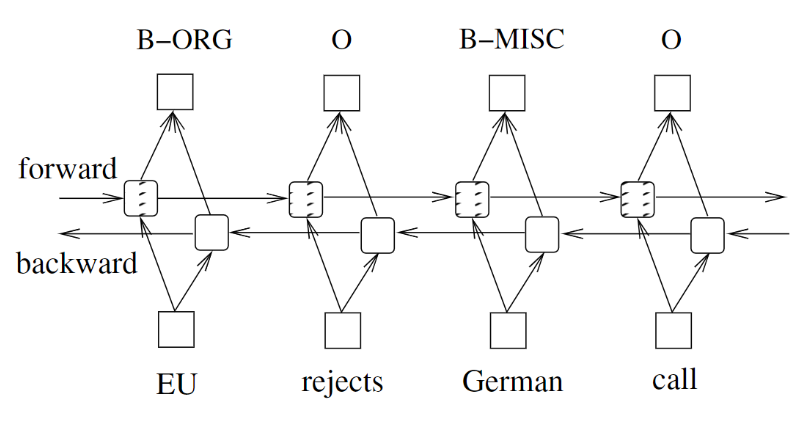

若输入句子由120个词组成，每个词由100维的词向量表示，则模型对应的输入是（120，100），经过BiLSTM后隐层向量变为T1（120，128），其中128为模型中BiLSTM的输出维度。如果不使用CRF层，则可以在模型最后加上一个全连接层用于分类。设分词任务的目标标签为B、I、S，则模型最终输出维度为（120，3）的向量。对于每个词对应的3个浮点值，分别表示对应BIS的概率，最后取概率大的标签作为预测label。通过大量的已标注数据和模型不断迭代优化，这种方式能够学习出不错的分词模型。

不过，虽然依赖于神经网络强大的非线性拟合能力，理论上已经能够学习出不错的模型。但是，上述模型只考虑了标签上的上下文信息。对于序列标注任务来说，当前位置的标签L_t与前一个位置L_t-1、后一个位置L_t+1都有潜在的关系。

例如，“我/S 爱/S 中/B 国/I”被标注为“我/S 爱/S 中/B 国/B”，由分词的标注规则可知，B标签后只能接I，因此上述模型利用这种标签之间的上下文信息。因此，自然语言处理领域的学者们提出了在模型后接一层CRF层，用于在整个序列上学习最优的标签序列。添加CRF层的模型如下图所示。

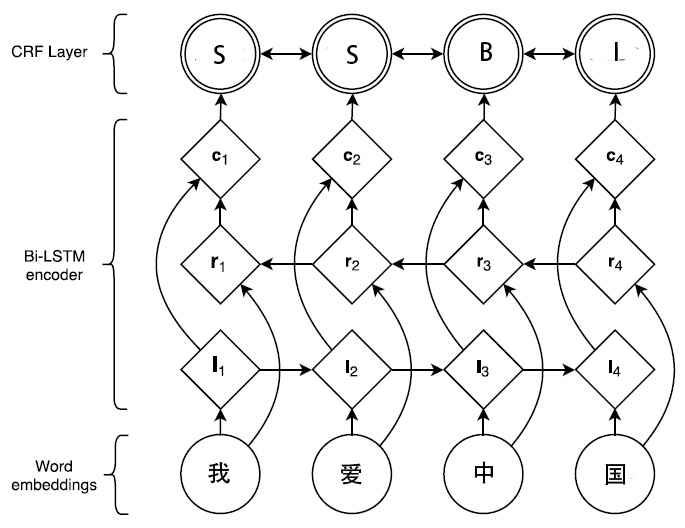

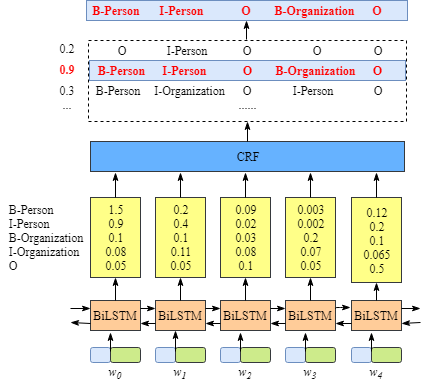

In [12]:
# 读取数据
raw = list()
data = list()
with open('./data/data.txt','r',encoding='utf-8') as f:
    raw = f.readlines()
with open('./data/data_2017213220.txt','r',encoding='utf-8') as f:
    raw.extend(f.readlines())
    for line in raw:
        line = line.strip()
        line = line.split('\t')
        if len(line) != 2:
            print('Bad line {}'.format(line))
        words,pos = line[0].split(' '),line[1].split(' ')
        data.append((words,pos))

'data[0] : ',data[0]

('data[0] : ',
 (['【',
   '环',
   '球',
   '网',
   '军',
   '事',
   '报',
   '道',
   '】',
   '印',
   '度',
   '空',
   '军',
   '计',
   '划',
   '在',
   '今',
   '年',
   '年',
   '底',
   '让',
   '现',
   '役',
   '的',
   '米',
   '格',
   '-',
   '27',
   '战',
   '斗',
   '机',
   '全',
   '部',
   '退',
   '役',
   '，',
   '彻',
   '底',
   '告',
   '别',
   '这',
   '款',
   '在',
   '印',
   '军',
   '中',
   '有',
   '着',
   '“',
   '飞',
   '行',
   '棺',
   '材',
   '”',
   '称',
   '号',
   '的',
   '战',
   '机',
   '。'],
  ['S-w',
   'B-n',
   'I-n',
   'I-n',
   'B-n',
   'I-n',
   'B-v',
   'I-v',
   'S-w',
   'B-ns',
   'I-ns',
   'B-n',
   'I-n',
   'B-n',
   'I-n',
   'S-p',
   'B-nt',
   'I-nt',
   'B-nt',
   'I-nt',
   'S-p',
   'B-a',
   'I-a',
   'S-u',
   'B-m',
   'I-m',
   'S-w',
   'S-m',
   'B-n',
   'I-n',
   'I-n',
   'B-n',
   'I-n',
   'B-v',
   'I-v',
   'S-w',
   'B-a',
   'I-a',
   'B-v',
   'I-v',
   'S-r',
   'S-n',
   'S-p',
   'B-n',
   'I-n',
   'S-nd',
   'B-v',
   'I-v',
   'S-w',
   'B-

In [13]:
# 构造词表，标签字典
vocab = set()
labels = set()
for words,pos in data:
    for w in words:
        vocab.add(w)
    for p in pos:
        labels.add(p)

print('vocab size：{}'.format(len(vocab)))
print('label size: {}'.format(len(labels)))

vocab size：6176
label size: 90


In [14]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
import time
import os 

torch.manual_seed(1)

In [15]:
def argmax(vec):
    # 返回序列中最大值的序号
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    # 将文本序列转换为id序列
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

In [16]:
# 构建模型

# BiLSTM_CRF
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score
    
    # CRF 维特比算法
    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

In [17]:
# 分割数据集
import random
data = data[:3000] # 因为使用CPU的关系，并且batch=1，应减少数据量
random.shuffle(data)
# train:dev:test = 6:2:2
train_data,test_data = data[:int(len(data) * 0.6)],data[int(len(data) * 0.6):]
eval_data,test_data = test_data[:int(len(test_data) * 0.5)],test_data[int(len(test_data) * 0.5):]

In [18]:
# 评价函数
def get_acc_metric(pred,target):
    corrent = 0
    total = 0
    for p,t in zip(pred,target):
        if p == t:
            corrent +=1
        total +=1
    return corrent,total

# 获取格式化时间
def get_s_time(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%02d:%02d:%02d" % (h, m, s)

In [19]:
# 训练模型
model_save_dir = './save'

START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 50
HIDDEN_DIM = 40

word_to_ix = {}
ix_to_word = {}
for i,v in enumerate(list(vocab)):
    word_to_ix[v] = i
    ix_to_word[i] = v

tag_to_ix = {}
ix_to_tag = {}
for i,tag in enumerate(list(labels)):
    tag_to_ix[tag] = i
    ix_to_tag[i] = tag

tag_to_ix[START_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[START_TAG]] = START_TAG
tag_to_ix[STOP_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[STOP_TAG]] = STOP_TAG

model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# 检查模型输入输出是否运作正常
with torch.no_grad():
    precheck_sent = prepare_sequence(train_data[0][0], word_to_ix)
    precheck_tags = torch.tensor([tag_to_ix[t] for t in train_data[0][1]], dtype=torch.long)
    print(model(precheck_sent))


start = time.time()
loss_all = list()
loss_avg_all = list()
loss_avg = None
decay = 0.99
eval_epoch_loss = list()
eval_metric = list()
for epoch in range(3): 
    model.train()
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(train_data):
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is,
        # turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)

        # Step 3. Run our forward pass.
        loss = model.neg_log_likelihood(sentence_in, targets)
        loss_all.append(loss.item())
        
        # calculate avg loss , decay = 0.99
        if loss_avg is None:
            loss_avg = loss.item()
        else:
            loss_avg = loss_avg * decay + (1 - decay) * loss.item()
        loss_avg_all.append(loss_avg)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
            
        if index % 100 == 0:
            print("epoch:{} - batch:{} : avg loss: {}, acc: {}%, total-time: {}".format(epoch,index,loss_avg,correct / total * 100.0,get_s_time(int(time.time()-start))))
            correct = 0
            total = 0
            
    # 验证模型
    model.eval()
    eval_loss_all = []
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(eval_data):
        with torch.no_grad():
            sentence_in = prepare_sequence(sentence, word_to_ix)
            targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
            eval_loss = model.neg_log_likelihood(sentence_in, targets)
            eval_loss_all.append(eval_loss.item())
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
    eval_epoch_loss.append(sum(eval_loss_all) / float(len(eval_data)))
    eval_metric.append(correct / total * 100.0)
    print()
    print('------ eval result ------')
    print('epoch {} : avg loss : {}, acc : {}%, total-time: {}'.format(epoch,sum(eval_loss_all) / float(len(eval_data)),correct / total * 100.0,get_s_time(int(time.time()-start))))
    print('-------------------------')
    print()
    
    # 保存模型
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    model_dir = os.path.join(model_save_dir, 'epoch_{}.model'.format(epoch))
    state = {
        'epoch': epoch,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'loss_avg' : loss_avg,
        'eval_loss_avg': sum(eval_loss_all) / float(len(eval_data)),
        'eval_acc':correct / total * 100.0,
        'epoch_all_time': get_s_time(int(time.time()-start))
    }
    torch.save(state, model_dir)

(tensor(88.8821), [49, 71, 28, 45, 67, 86, 30, 54, 49, 71, 28, 31, 68, 74, 14, 11, 65, 12, 61, 30, 54, 49, 71, 28, 45, 30, 54, 49, 71, 28, 45])
epoch:0 - batch:0 : avg loss: 141.59124755859375, acc: 6.451612903225806%, total-time: 00:00:01
epoch:0 - batch:100 : avg loss: 143.15254321437982, acc: 19.379325742353203%, total-time: 00:01:36
epoch:0 - batch:200 : avg loss: 131.34473840571013, acc: 32.559572719802794%, total-time: 00:03:22
epoch:0 - batch:300 : avg loss: 117.61035992523266, acc: 36.07157381049207%, total-time: 00:05:09
epoch:0 - batch:400 : avg loss: 112.01261649687872, acc: 38.053613053613056%, total-time: 00:06:58
epoch:0 - batch:500 : avg loss: 93.04303408569903, acc: 40.339061774268465%, total-time: 00:08:30
epoch:0 - batch:600 : avg loss: 87.68677498281201, acc: 44.241904353420544%, total-time: 00:10:15
epoch:0 - batch:700 : avg loss: 84.38563995866811, acc: 47.04333738355609%, total-time: 00:11:56
epoch:0 - batch:800 : avg loss: 77.17721657050664, acc: 48.8013698630137

In [20]:
# 测试模型

# 载入模型
model_dir = './save/epoch_2.model'
state = torch.load(model_dir)
model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
model.load_state_dict(state['state_dict'])
model.eval()
correct = 0
total = 0
for index, (sentence, tags) in enumerate(test_data):
    with torch.no_grad():
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
        _ , pred = model(sentence_in)
        c,all_ = get_acc_metric(pred,targets.data.tolist())
        correct += c
        total += all_
print()
print('------ test result ------')
print('test acc : {}%'.format(correct / total * 100.0))
print('-------------------------')
print()



------ test result ------
test acc : 66.98214887167396%
-------------------------



# 几个额外加分点
## 1. 这个只是一个简单的模型训练框架，较为完善的模型训练应使用GPU训练，采用mini-batch方式进行训练，采用更好的优化器训练，同时还要有早停机制，将模型训练到最佳。
## 2. 同时评价指标应使用召回率、准确率、F1评价指标,具体参考[这个链接](https://blog.csdn.net/qq_37667364/article/details/83904549)

## 完成额外任务的同学可以在验收的时候跟助教提一下

# 模型训练和模型结果可视化

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] =(16,9) # 设置图片分辨率 1600 * 900
plt.rcParams['figure.dpi'] = 300 # 分辨率

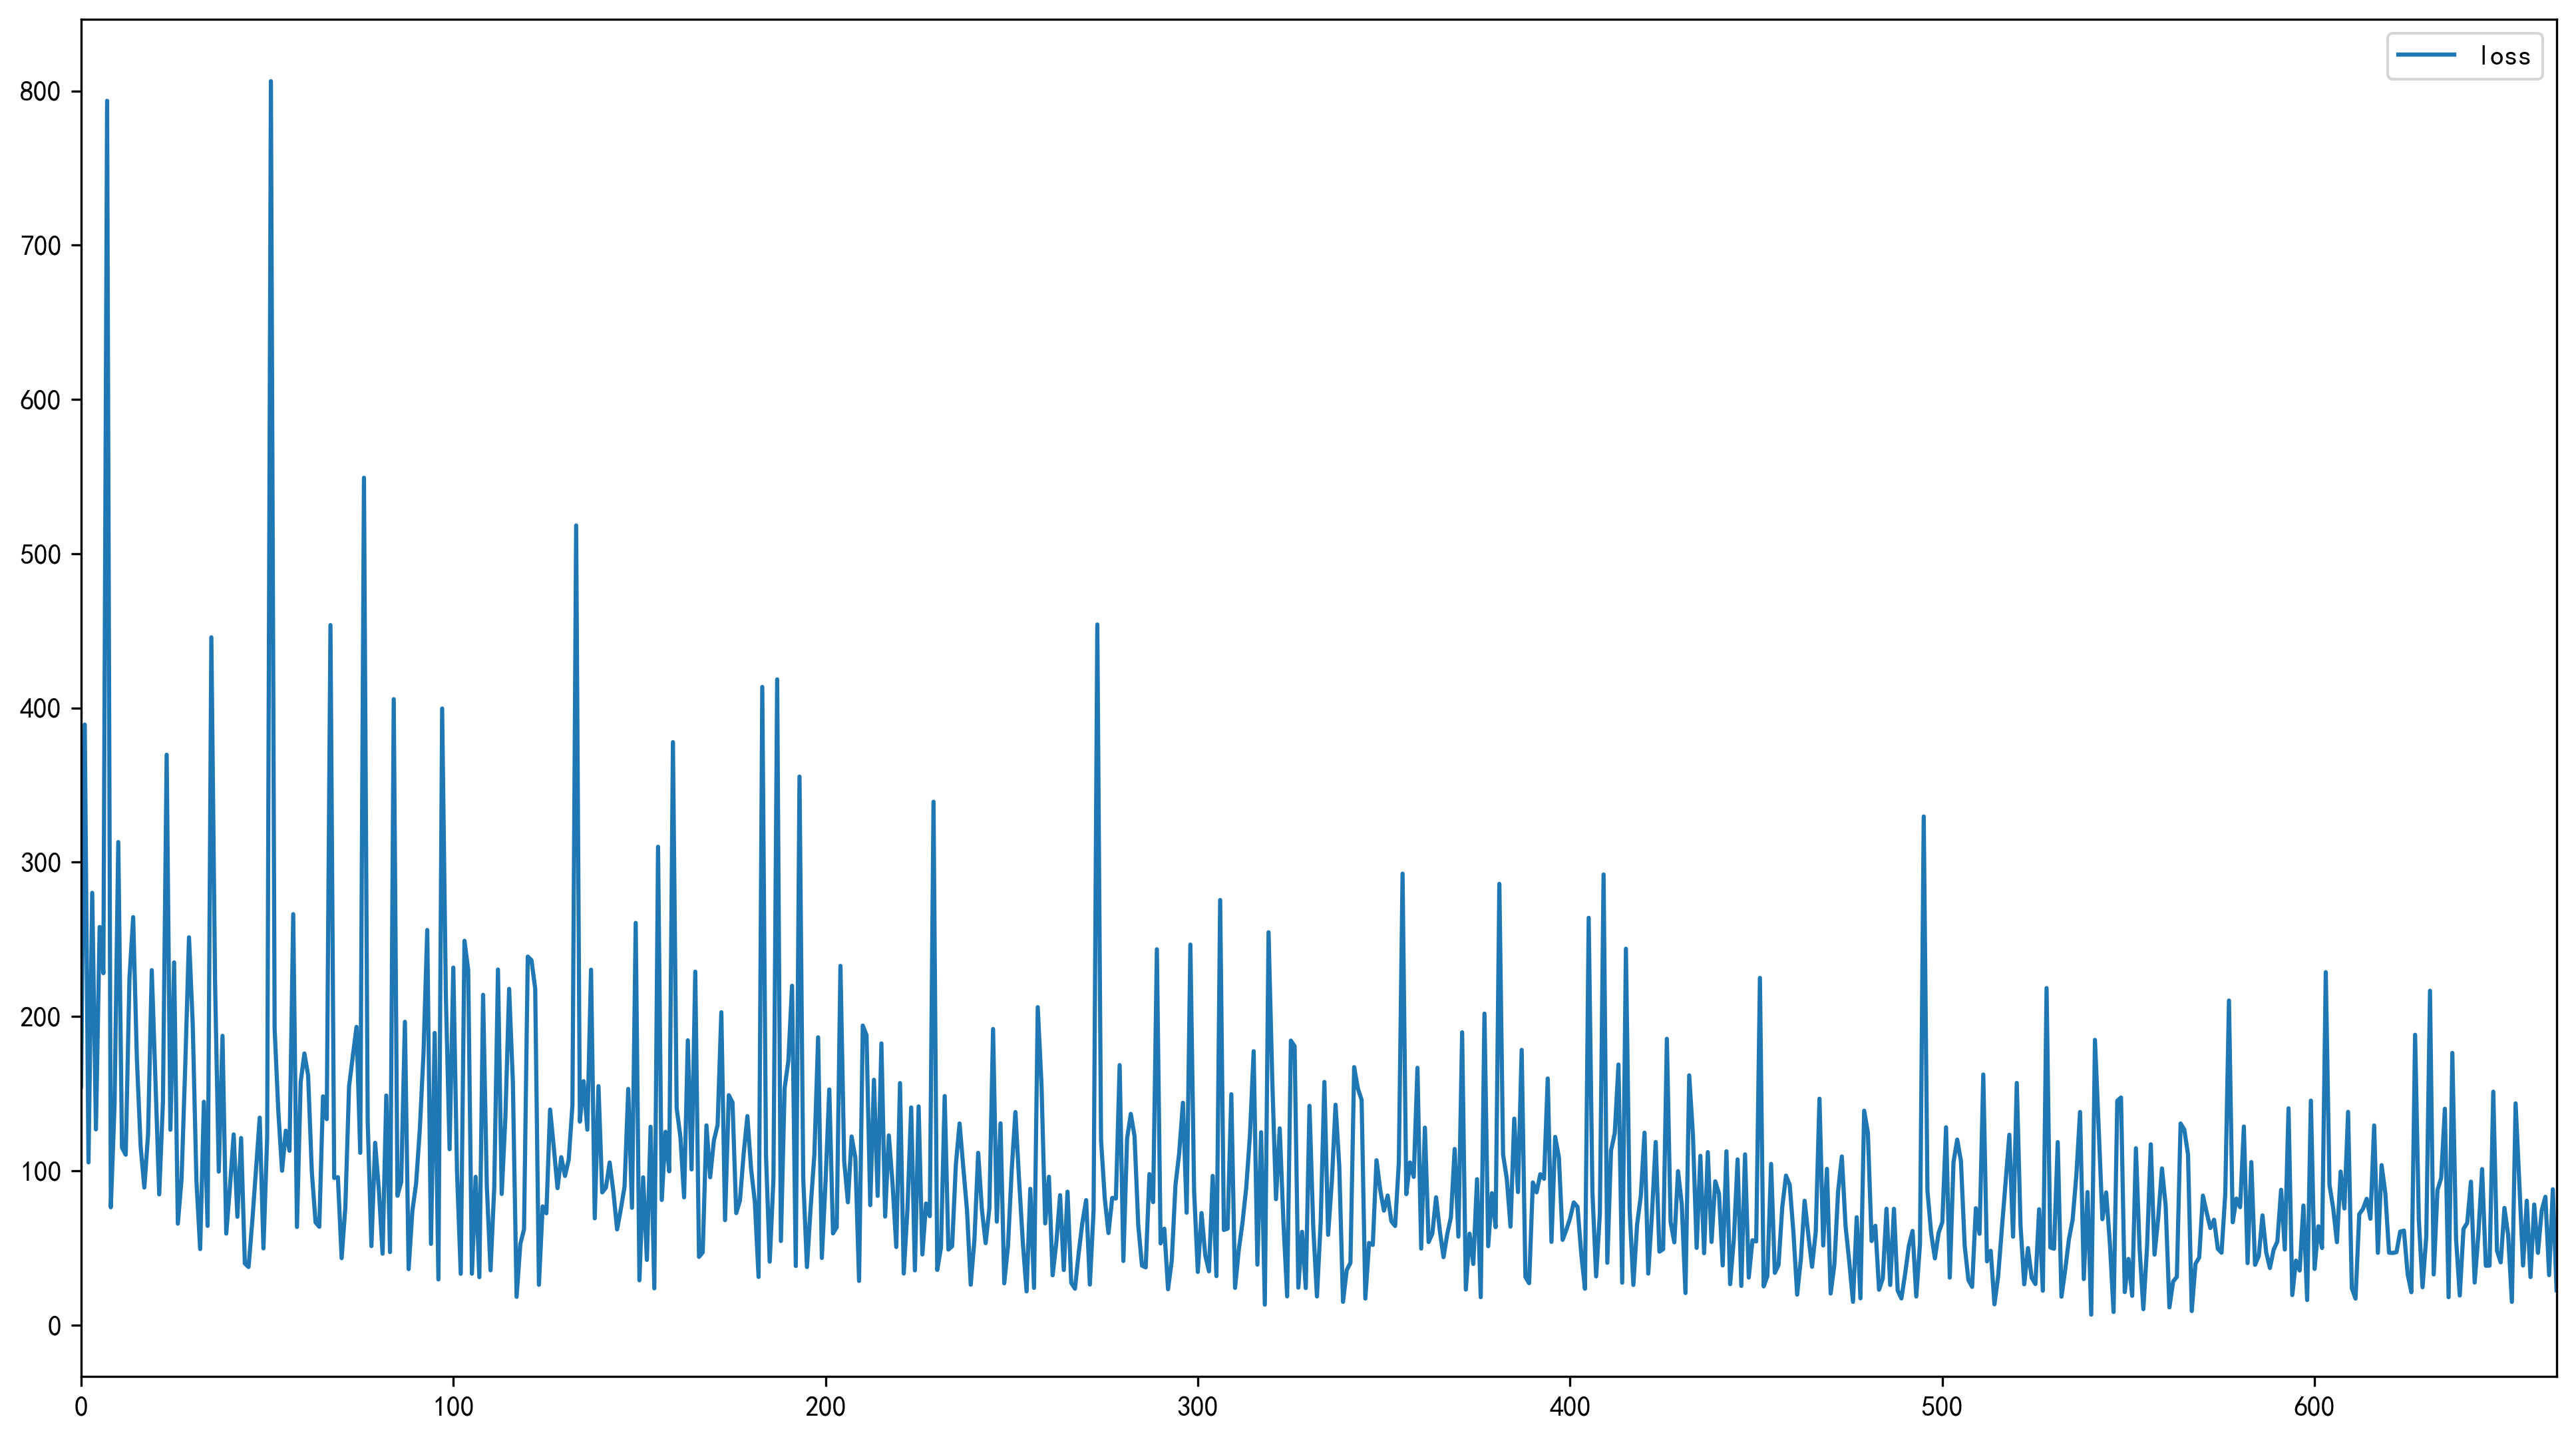

In [23]:
# 绘制batch-training loss折线图 loss_all 和 loss_avg_all 
loss_all_df = pd.DataFrame()
loss_all_df['loss'] = loss_all
loss_all_df.plot()

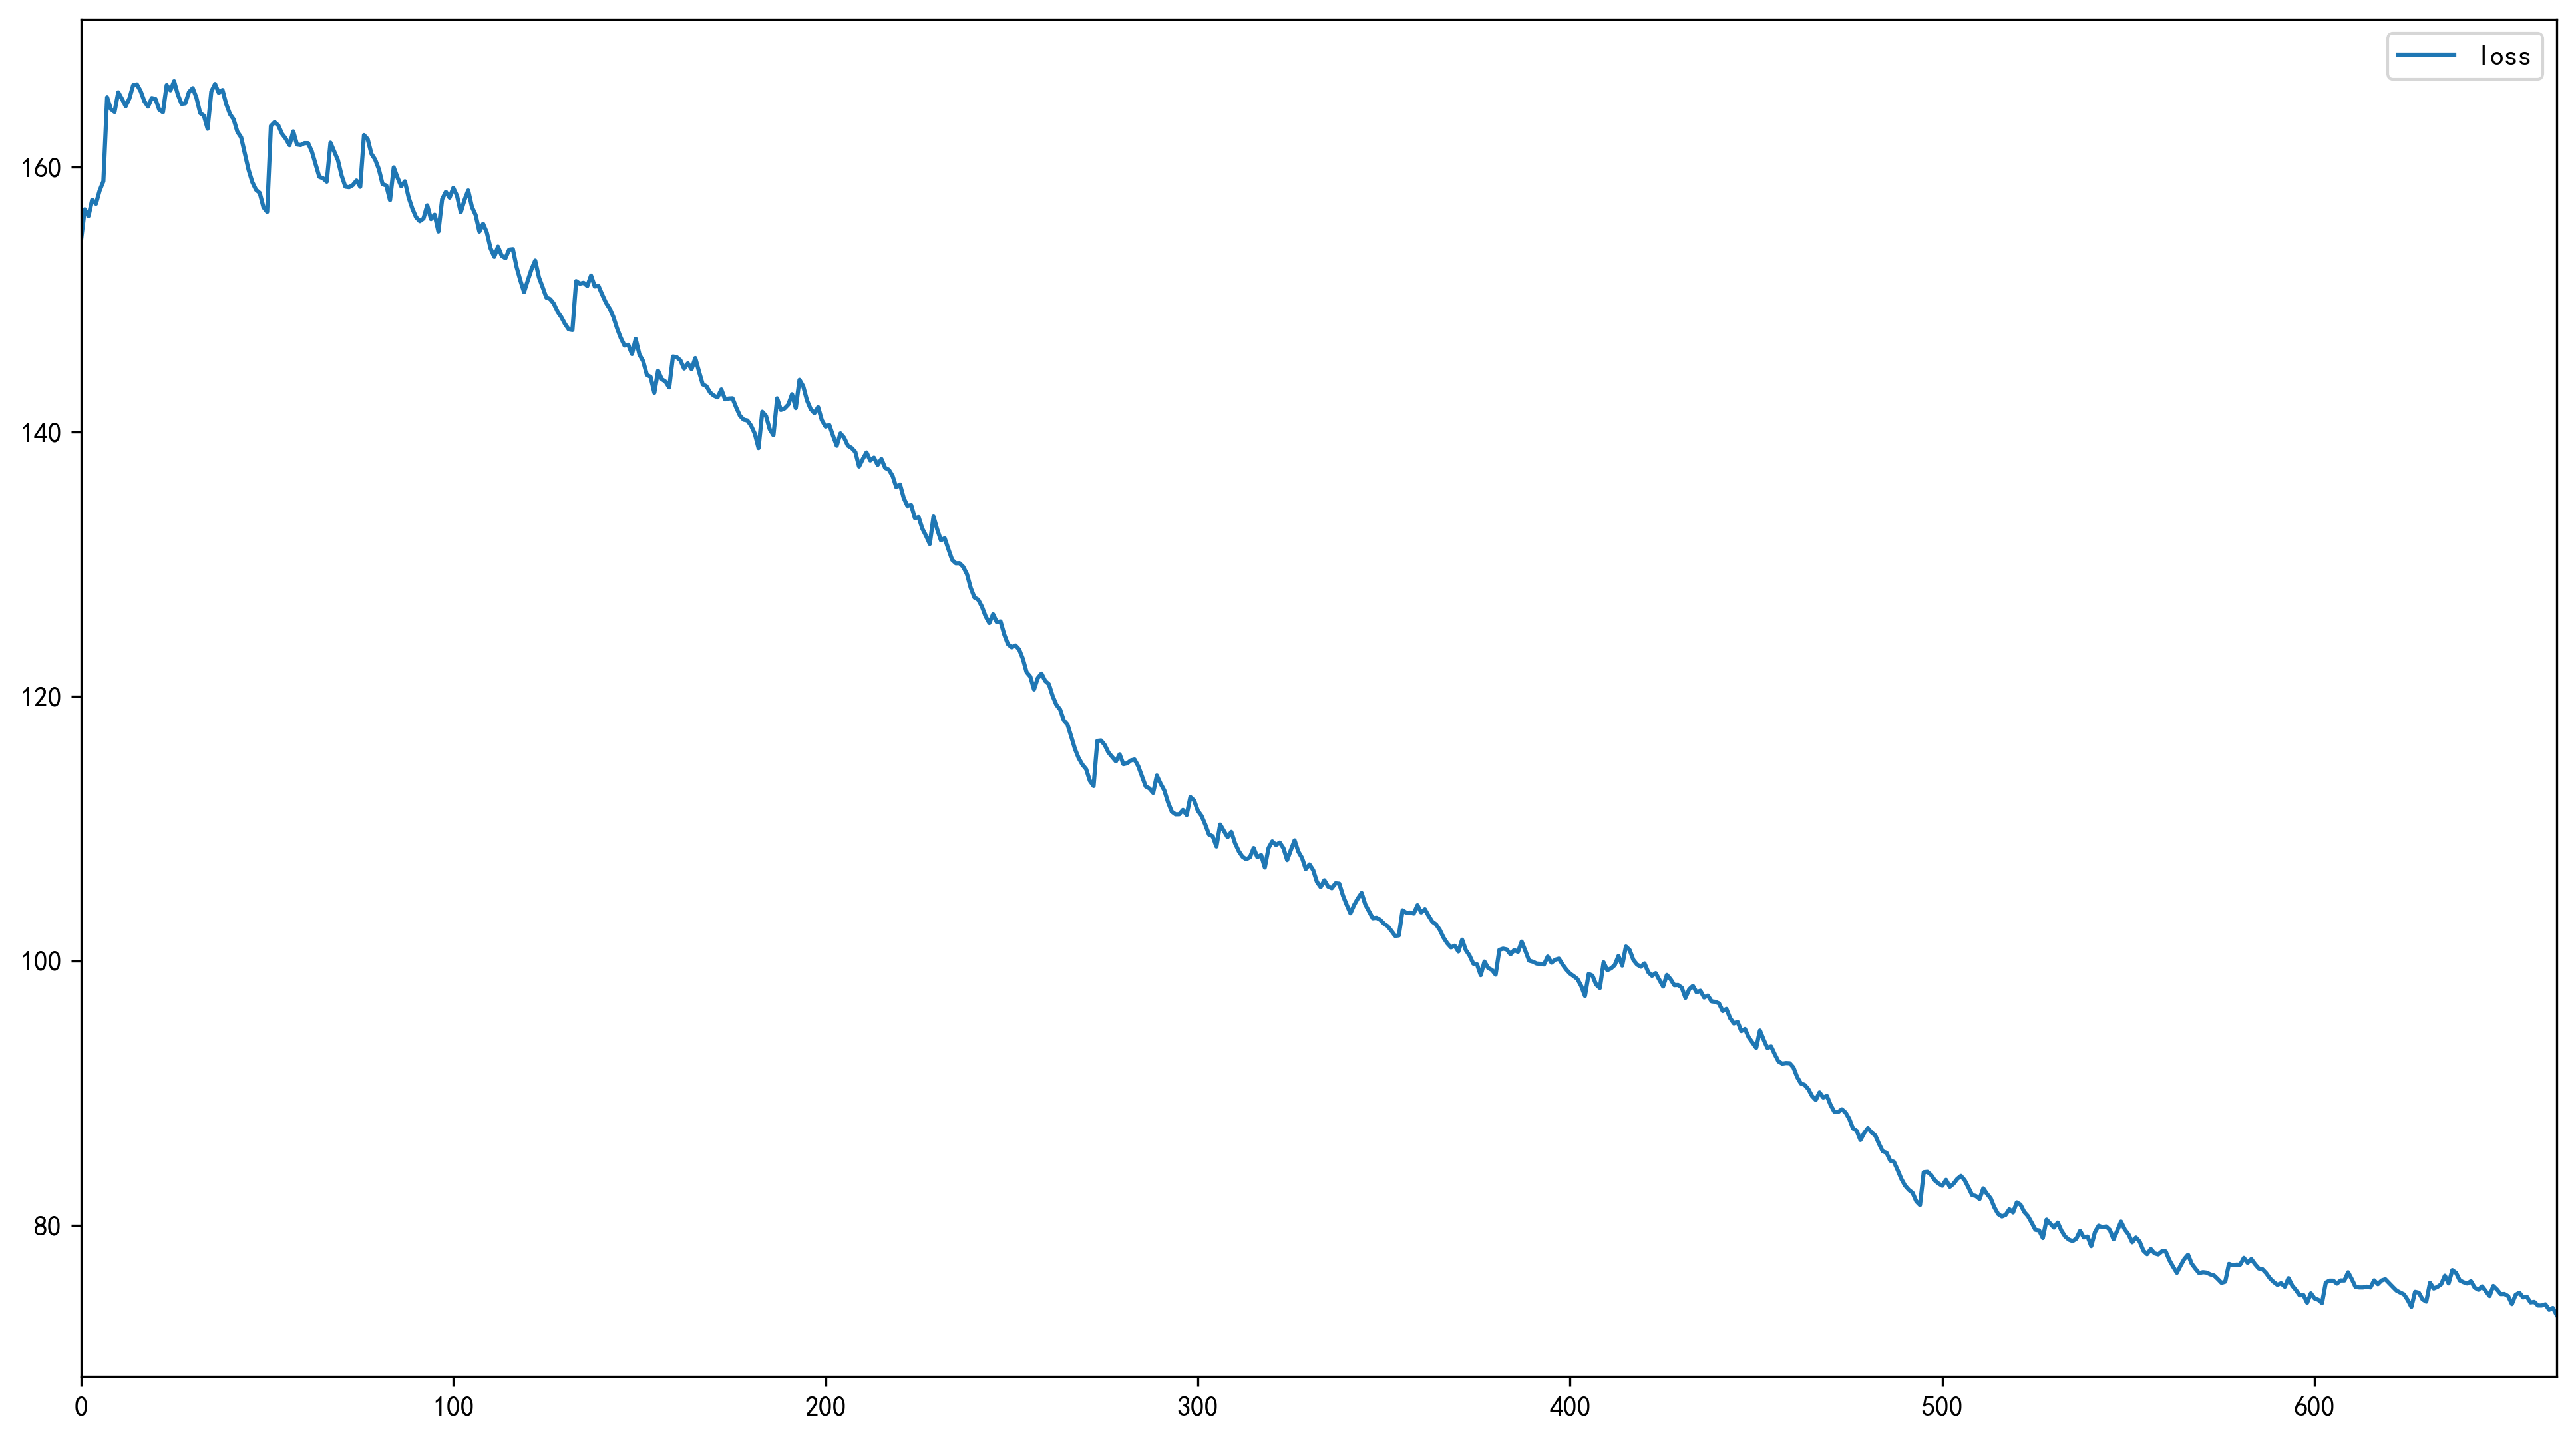

In [24]:
loss_avg_all_df = pd.DataFrame()
loss_avg_all_df['loss'] = loss_avg_all
loss_avg_all_df.plot()